# 預處理

In [62]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
filepath = '../datasets/titanic3.xls'
all_df = pd.read_excel(filepath)

In [3]:
all_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [4]:
all_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
cols = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df = all_df[cols]

In [6]:
df = all_df.drop(['name'], axis = 1)

In [7]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.0000,0,0,211.3375,S
1,1,1,male,0.9167,1,2,151.5500,S
2,0,1,female,2.0000,1,2,151.5500,S
3,0,1,male,30.0000,1,2,151.5500,S
4,0,1,female,25.0000,1,2,151.5500,S


In [8]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

In [9]:
age_mean = df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
fare_mean = df['fare'].mean()
df['fare'] = df['fare'].fillna(fare_mean)

In [10]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
dtype: int64

In [11]:
df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)

In [12]:
x_OneHot_df = pd.get_dummies(data = df, columns = ['embarked'])

In [13]:
x_OneHot_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked_C,embarked_Q,embarked_S
0,1,1,0,29.0000,0,0,211.3375,0,0,1
1,1,1,1,0.9167,1,2,151.5500,0,0,1
2,0,1,0,2.0000,1,2,151.5500,0,0,1
3,0,1,1,30.0000,1,2,151.5500,0,0,1
4,0,1,0,25.0000,1,2,151.5500,0,0,1


In [14]:
ndarray = x_OneHot_df.values

In [15]:
ndarray.shape

(1309, 10)

In [16]:
Label = ndarray[:,0]
Features = ndarray[:, 1:]

In [17]:
Features[0]

array([  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
         0.    ,   0.    ,   1.    ])

### 標準化

In [18]:
from sklearn import preprocessing

In [19]:
minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))

In [20]:
scaledFeatures = minmax_scale.fit_transform(Features)

In [21]:
scaledFeatures[0]

array([0.        , 0.        , 0.36116884, 0.        , 0.        ,
       0.41250333, 0.        , 0.        , 1.        ])

### 切割

In [22]:
msk = np.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print(len(train_df))
print(len(test_df))

1062
247


In [23]:
def PreprocessData(all_df):
    df = all_df.drop(['name'], axis = 1)
    age_mean = df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean = df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female': 0, 'male': 1}).astype(int)
    x_OneHot_df = pd.get_dummies(data = df, columns = ['embarked'])
    ndarray = x_OneHot_df.values
    Label = ndarray[:,0]
    Features = ndarray[:, 1:]
    minmax_scale = preprocessing.MinMaxScaler(feature_range = (0, 1))
    scaledFeatures = minmax_scale.fit_transform(Features)
    return scaledFeatures, Label

In [24]:
train_Features, train_Label = PreprocessData(train_df)
test_Features, test_Label = PreprocessData(test_df)

In [33]:
train_Features[0]

array([0.        , 0.        , 0.36116884, 0.        , 0.        ,
       0.41250333, 0.        , 0.        , 1.        ])

In [34]:
train_Label[0]

1.0

In [35]:
test_Features[0]

array([0.       , 1.       , 0.0035545, 0.125    , 0.4      , 0.2958059,
       0.       , 0.       , 1.       ])

In [36]:
test_Label[0]

1.0

# 建模

In [37]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [38]:
model = Sequential()

### 隱藏層1

In [39]:
model.add(Dense(
    units = 40,
    input_dim = 9,
    kernel_initializer = 'uniform',
    activation = 'relu',
))

### 隱藏層2

In [40]:
model.add(Dense(
    units = 40,
    kernel_initializer = 'uniform',
    activation = 'relu',
))

### 輸出層

In [41]:
model.add(Dense(
    units = 1,
    kernel_initializer = 'uniform',
    activation = 'sigmoid',
))

# 訓練

In [42]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [53]:
train_history = model.fit(
    x = train_Features,
    y = train_Label,
    validation_split = 0.1,
    epochs = 50,
    batch_size = 30,
    verbose = 2
)

Train on 955 samples, validate on 107 samples
Epoch 1/50
 - 0s - loss: 0.4428 - acc: 0.7969 - val_loss: 0.4131 - val_acc: 0.8411
Epoch 2/50
 - 0s - loss: 0.4435 - acc: 0.8084 - val_loss: 0.4148 - val_acc: 0.8411
Epoch 3/50
 - 0s - loss: 0.4435 - acc: 0.8031 - val_loss: 0.4118 - val_acc: 0.8318
Epoch 4/50
 - 0s - loss: 0.4431 - acc: 0.8031 - val_loss: 0.4121 - val_acc: 0.8224
Epoch 5/50
 - 0s - loss: 0.4423 - acc: 0.8063 - val_loss: 0.4174 - val_acc: 0.8411
Epoch 6/50
 - 0s - loss: 0.4410 - acc: 0.8000 - val_loss: 0.4106 - val_acc: 0.8224
Epoch 7/50
 - 0s - loss: 0.4417 - acc: 0.8063 - val_loss: 0.4118 - val_acc: 0.8131
Epoch 8/50
 - 0s - loss: 0.4399 - acc: 0.8031 - val_loss: 0.4109 - val_acc: 0.8318
Epoch 9/50
 - 0s - loss: 0.4384 - acc: 0.8000 - val_loss: 0.4189 - val_acc: 0.8411
Epoch 10/50
 - 0s - loss: 0.4374 - acc: 0.8052 - val_loss: 0.4104 - val_acc: 0.8224
Epoch 11/50
 - 0s - loss: 0.4386 - acc: 0.8042 - val_loss: 0.4114 - val_acc: 0.8318
Epoch 12/50
 - 0s - loss: 0.4387 - acc:

In [54]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'])
    plt.show()

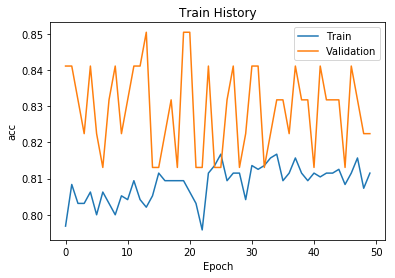

In [55]:
show_train_history(train_history, 'acc', 'val_acc')

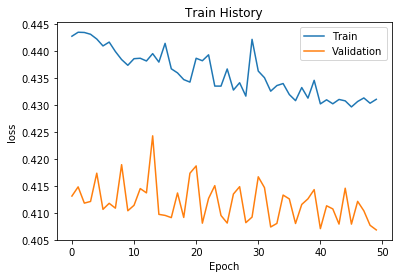

In [56]:
show_train_history(train_history, 'loss', 'val_loss')

In [57]:
scores = model.evaluate(
    x = test_Features, 
    y = test_Label
)

247/247 [==============================] - 0s 88us/step


In [58]:
scores

[0.47254031462225354, 0.7854250995253744]

# Jack & Rose

In [63]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])

In [64]:
JR_df = pd.DataFrame([list(Jack), list(Rose)],
                     columns = ['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']                    
                    )
all_df = pd.concat([all_df, JR_df])
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [65]:
all_Features, Label = PreprocessData(all_df)

In [66]:
all_probability = model.predict(all_Features)

In [67]:
pd = all_df
pd.insert(len(all_df.columns),
          'probability',
          all_probability,
         )

In [68]:
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.110492
1,1,Rose,1,female,20.0,1,0,100.0,S,0.969618
